# Analyzing images of singledoubletriple vertical lines

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid.v_tools as vt
import py.metrics.m_SDT as me
from py.im.imshow import imshow
import py.file.file_handling as fh
import pandas as pd
LOGGERDEFINED = logs.openLog('still_measure.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# generate training data

In [ ]:
# export cropped images and table of their crop locations
folder = [os.path.join(cfg.path.server, 'SDT', s) for s in ['SO_S20-0.5', 'SO_S85-0.05']]
exp = me.cropExporter(folder, me.fileVertSDT, mustMatch=['Vert'], overwrite=False)
exp.run()

In [4]:
# copy all cropped files to a separate folder for easy file transfer to wipp
cropfolder = os.path.join(cfg.path.server, 'singleDoubleTripleML', 'newCropsVert')
for s in ['SO_S20-0.5', 'SO_S85-0.05']:
    topfolder = os.path.join(cfg.path.server, r'SDT', s)
    me.copyToMLInputFolder(cropfolder, topfolder, mustMatch=['Vert'])

In [ ]:
# copy all cropped files to a separate folder for easy file transfer to wipp
cropfolder = os.path.join(cfg.path.server, 'SDT', 'newCrops')
topfolder = os.path.join(cfg.path.server, r'SDT\SO_S20-0.5')
me.copyToMLInputFolder(cropfolder, topfolder, mustMatch=['Vert'], reg='.*o1.*')

In [5]:
folder = os.path.join(cfg.path.server, 'singleDoubleTripleML', 'newCropsVert')
me.splitIntoSubFolders(folder)

In [7]:
# move ML segmented images from the output folder to the appropriate subfolders
folders = [os.path.join(cfg.path.server
                       , r'singleDoubleTripleML\results'
                       , f'lf-unet-vert-SO-{s}-segment-outputDir'
                       , 'png') for s in [8,9,10,11]]
rm = me.resultMover(folders,os.path.join(cfg.path.server, 'SDT'))

INFO: Copying 26732 files in ['//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\singleDoubleTripleML\\results\\lf-unet-vert-SO-8-segment-outputDir\\png', '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\singleDoubleTripleML\\results\\lf-unet-vert-SO-9-segment-outputDir\\png', '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\singleDoubleTripleML\\results\\lf-unet-vert-SO-10-segment-outputDir\\png', '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\singleDoubleTripleML\\results\\lf-unet-vert-SO-11-segment-outputDir\\png']
INFO: Copied 0, already 1, total 26732
INFO: Copied 0, already 101, total 26732
INFO: Copied 0, already 201, total 26732
INFO: Copied 0, already 301, total 26732
INFO: Copied 0, already 401, total 26732
INFO: Copied 0, already 501, total 26732
INFO: Copied 0, already 601, total 26732
INFO: Copied 0, already 701, total 26732
INFO: Copied 0, already 801, total 26732
INFO: Copied 0, already 901, total 26732
INFO: Copied

### creating training data

In [27]:
tg = me.trainingGenerator(os.path.join(cfg.path.server, 'SDT')
                          , excludeFolders=[os.path.join(cfg.path.fig, 'SDT\trainingVert\segmented'),
                                          os.path.join(cfg.path.fig, 'SDT\trainingVert\evaluate\segmented')]
                          , mustMatch='disturbVert')

In [31]:
file = tg.randomFile()

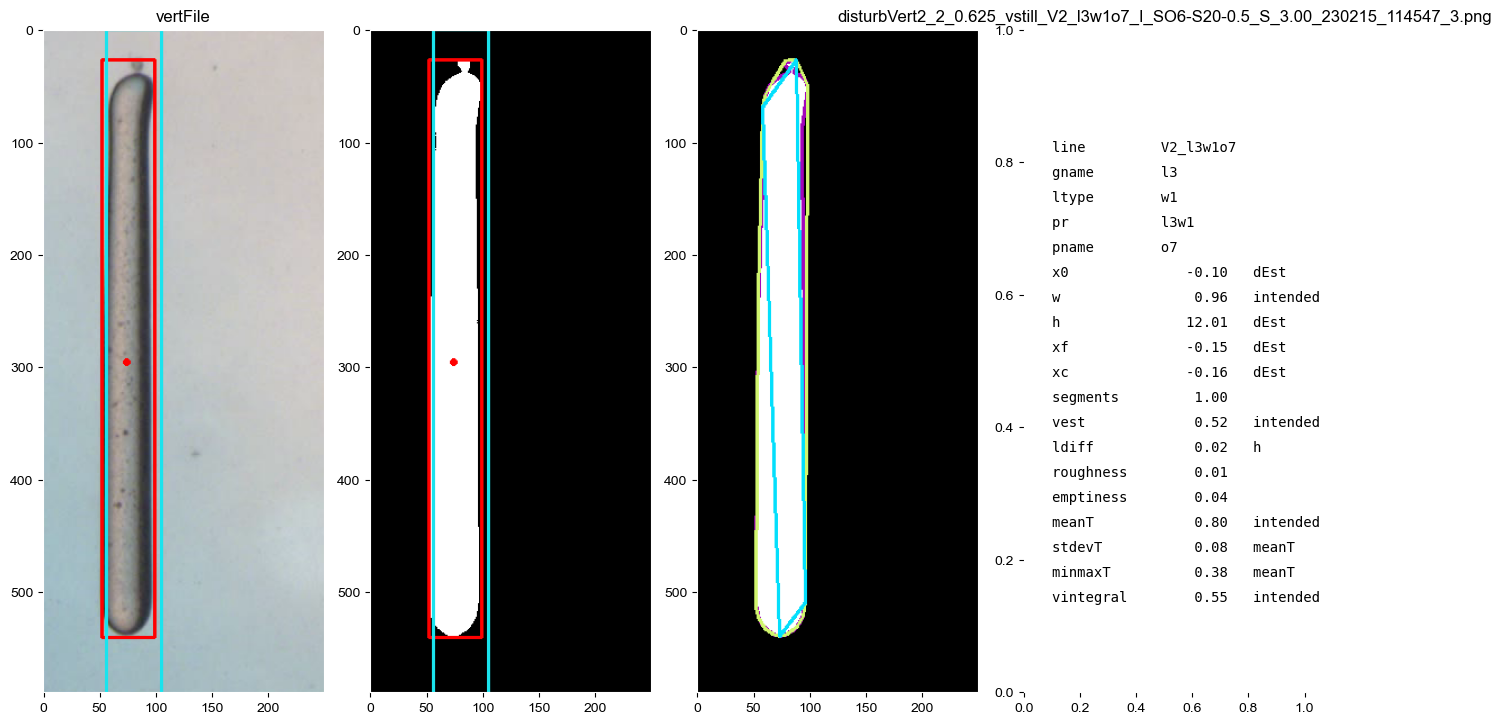

In [32]:
vs = me.fileVertSDT(file, diag=1, overrideSegment=False)

In [485]:
# add to training as is
vs.addToTraining(trainFolder=r'SDT\trainingVert\evaluate')

Exported disturbVert2_2_1.000_vstill_V2_l3w1o1_I_SO6-S20-0.5_S_3.50_230215_153028_8.png to training data


In [476]:
# add to training, but open paint
vs.addToTraining(trainFolder=r'SDT\trainingVert\evaluate', openPaint=True)

Exported disturbVert2_1_1.000_vstill_V1_l0d1p1_I_SO9_S_3.50_230207_144705_1.png to training data


In [373]:
# add thresh to training and open paint
vs.addToTraining(s='thresh', trainFolder=r'SDT\trainingVert\evaluate')

Exported disturbVert2_3_0.750_vstill_V3_l1w3p5_I_SO6-S20-0.5_S_4.00_230215_185625_8.png to training data


In [10]:
me.convertFilesToBW(r'C:\Users\lmf1\OneDrive - NIST\NIST\data\shopbot\results\SDT\trainingVert\segmented', diag=True)

(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(587, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(574, 250, 3) [0 1] [0 0 0]
(532, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(517, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(588, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(543, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(512, 250, 3) [0 1] [0 0 0]
(583, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] [0 0 0]
(590, 250, 3) [0 1] 

# compare to manual segmentation

#### unsupervised model

In [513]:
sc = me.segmentCompare(r'C:\Users\lmf1\OneDrive - NIST\NIST\data\shopbot\results\SDT\trainingVert\evaluate\segmented'
                       , os.path.join(cfg.path.server, 'SDT')
                       , r'C:\Users\lmf1\OneDrive - NIST\NIST\data\shopbot\results\SDT\trainingVert\evaluate\orig'
                        , me.vertSegmentSDT)
sc.compare()

Success rate: 0.918, Average diff: 0.008
    result  difference
1    Found      0.2440
111  Found      0.1814
109  Found      0.1388
86   Found      0.1068
132  Found      0.0786
73   Found      0.0707
140  Found      0.0534
145  Found      0.0516
82   Found      0.0450
127  Found      0.0412
74   Found      0.0307
33   Found      0.0184
Red = algorithm, green = manual


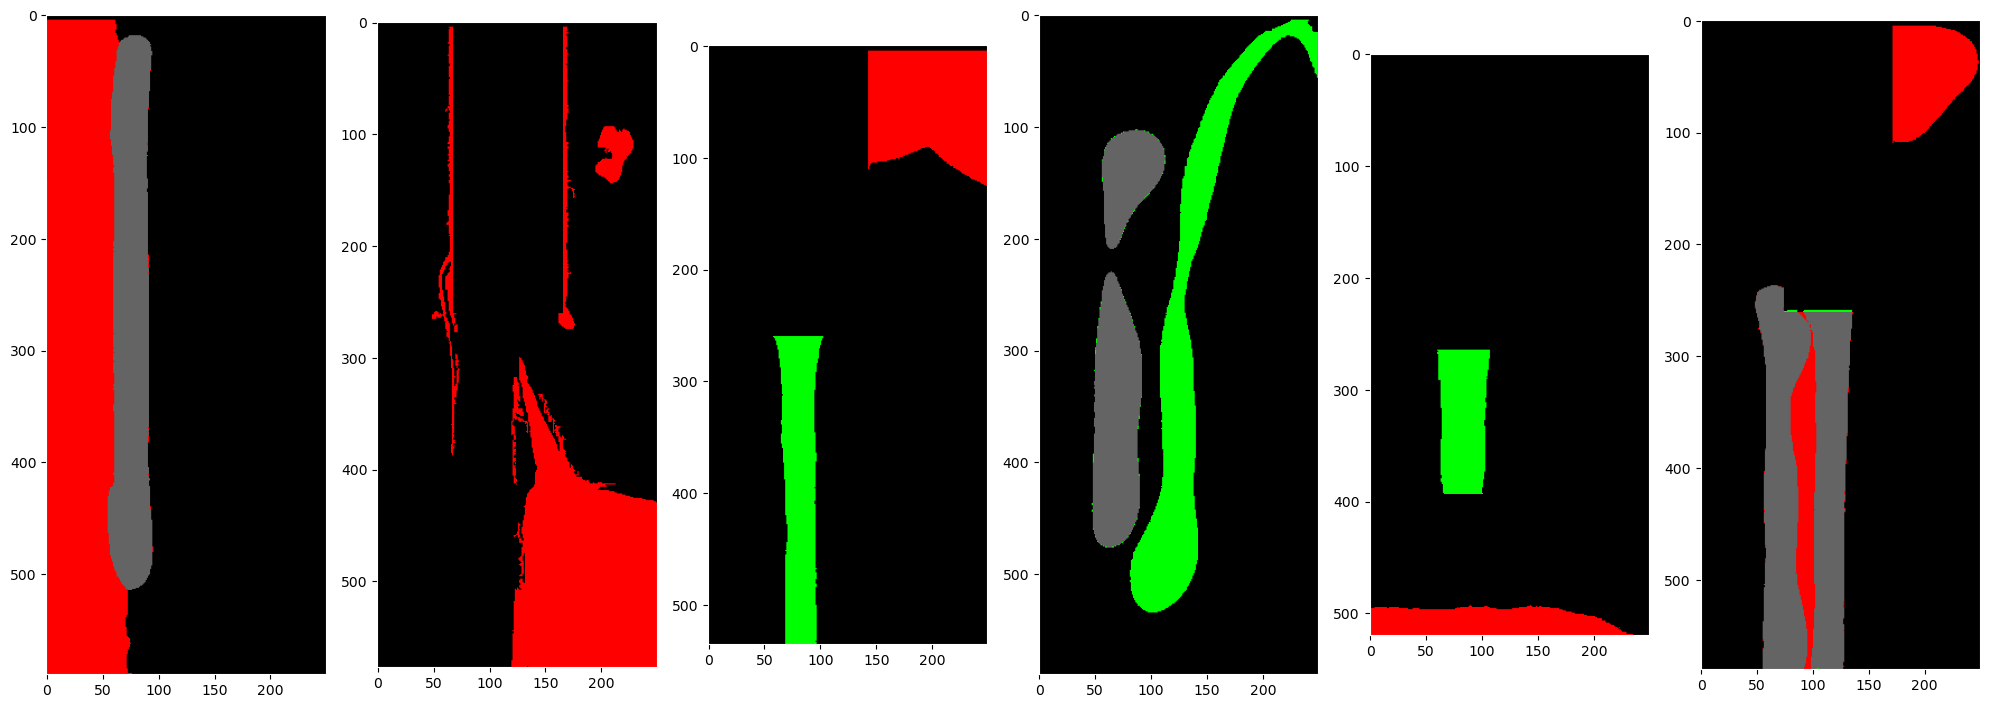

In [542]:
sc.showWorstSegmentation()

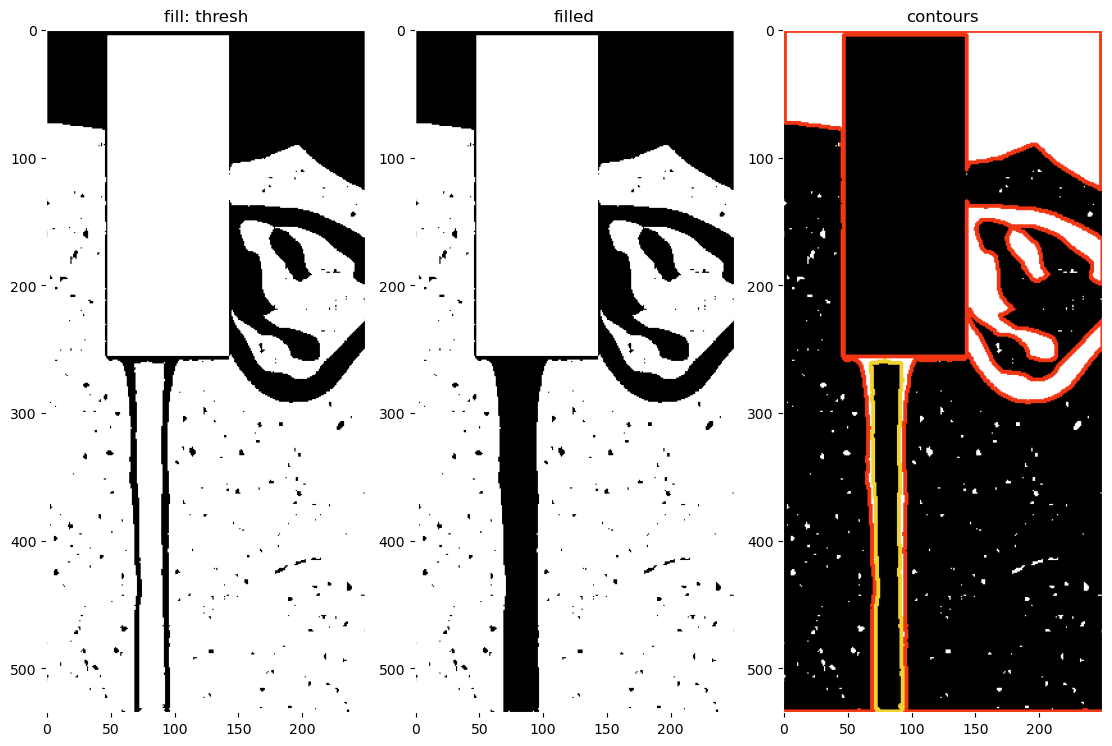

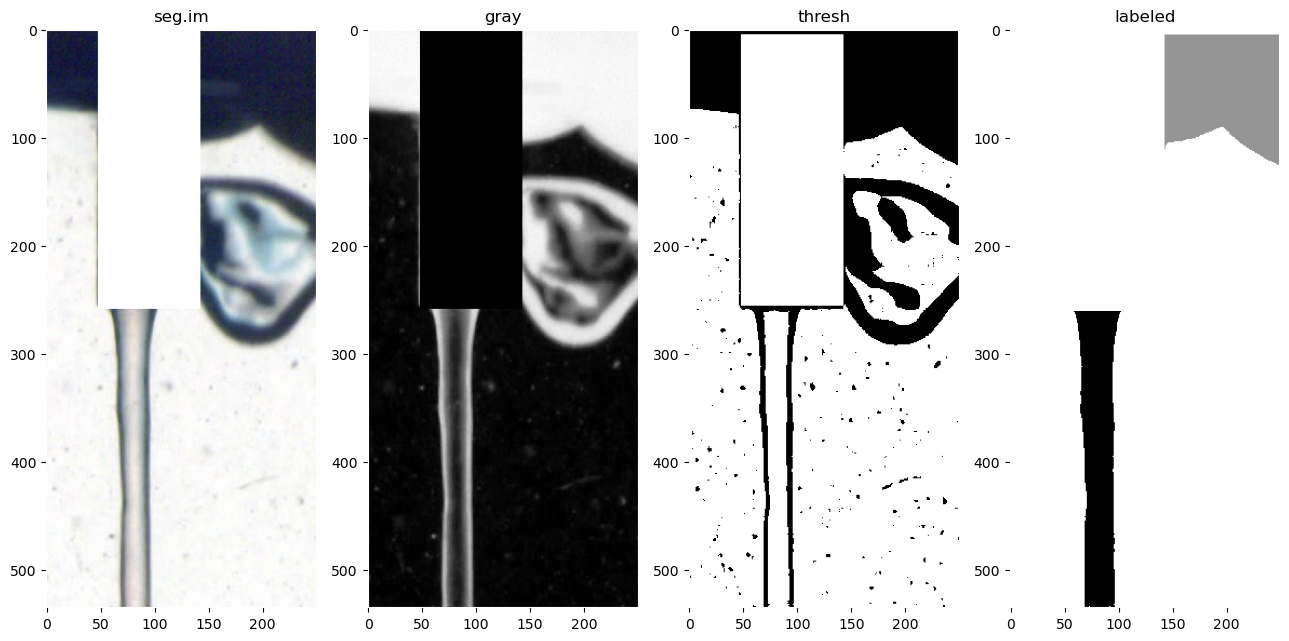

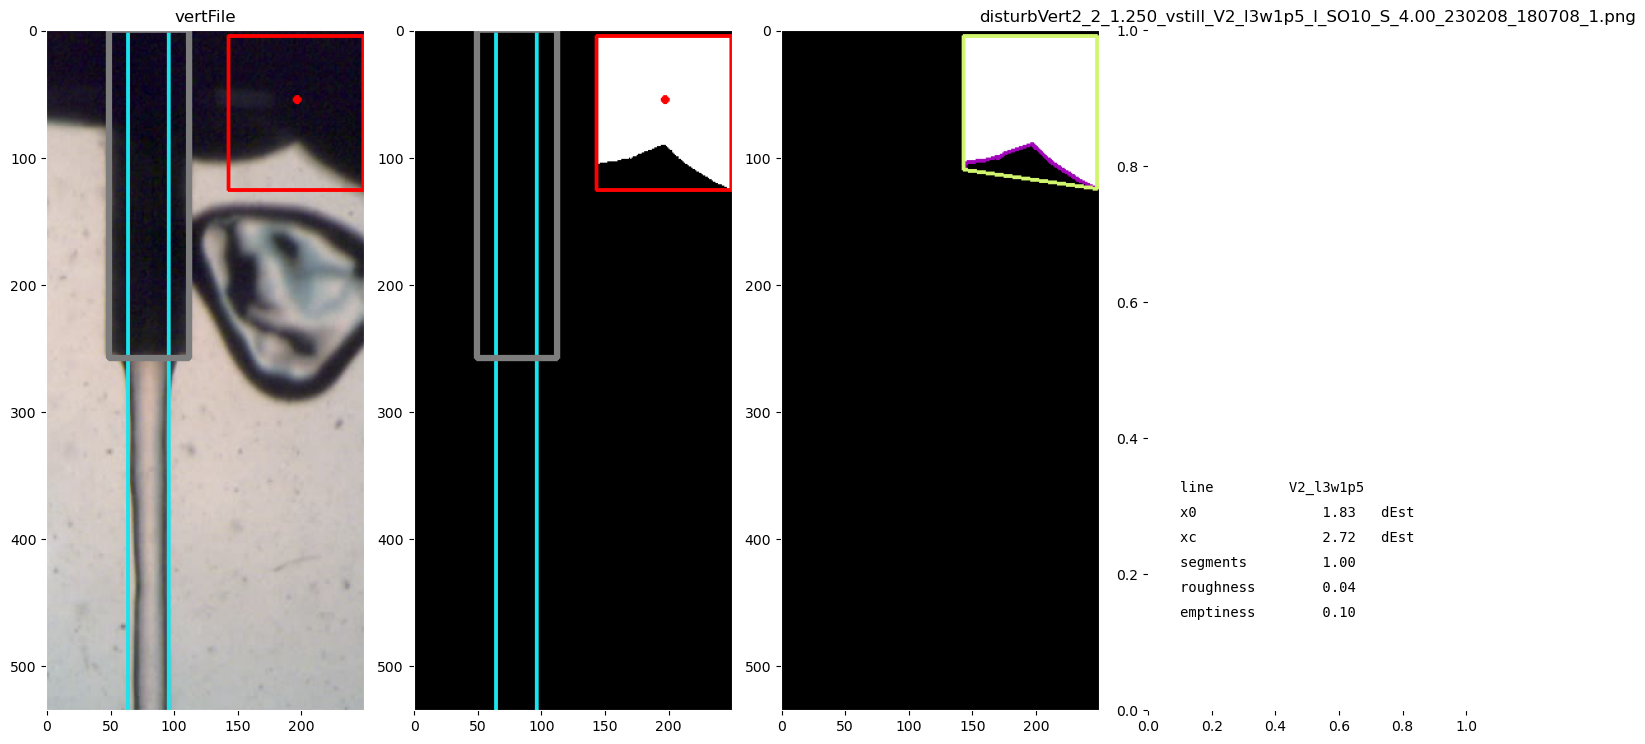

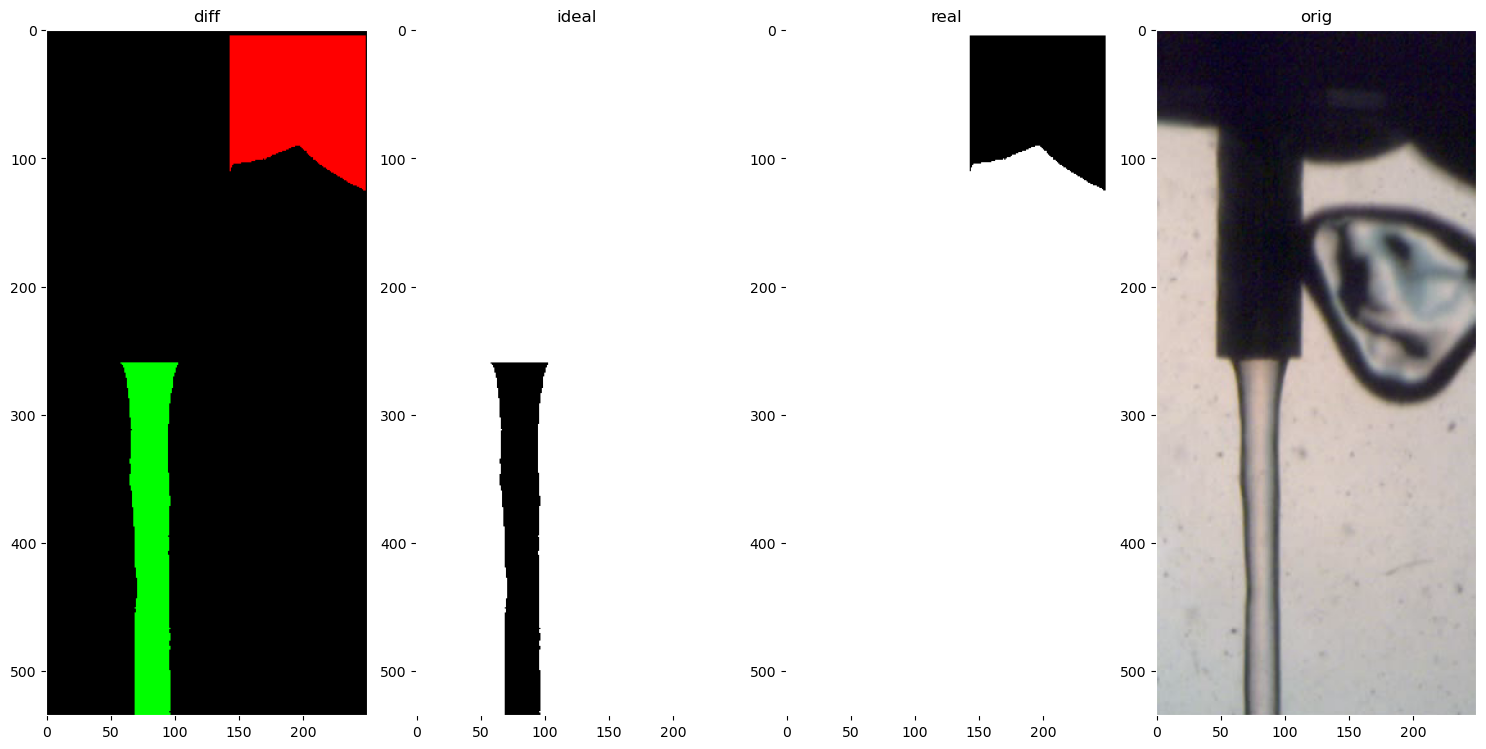

In [543]:
sc.compareFile(109, diag=4)

#### ML model

In [18]:
me.removeOme(r'C:\Users\lmf1\OneDrive - NIST\NIST\data\shopbot\results\SDT\trainingVert\evaluate\png')

In [19]:
scm = me.segmentCompare(r'C:\Users\lmf1\OneDrive - NIST\NIST\data\shopbot\results\SDT\trainingVert\evaluate\segmented'
                       , r'C:\Users\lmf1\OneDrive - NIST\NIST\data\shopbot\results\SDT\trainingVert\evaluate\png'
                       , r'C:\Users\lmf1\OneDrive - NIST\NIST\data\shopbot\results\SDT\trainingVert\evaluate\orig'
                        , 'folder')

In [20]:
scm.compare()

Success rate: 0.873, Average diff: 0.006
    result  difference
1    Found      0.1071
86   Found      0.0260
66   Found      0.0239
144  Found      0.0222
117  Found      0.0207
77   Found      0.0195
115  Found      0.0177
111  Found      0.0174
2    Found      0.0164
10   Found      0.0160
126  Found      0.0145
82   Found      0.0134
Red = algorithm, green = manual


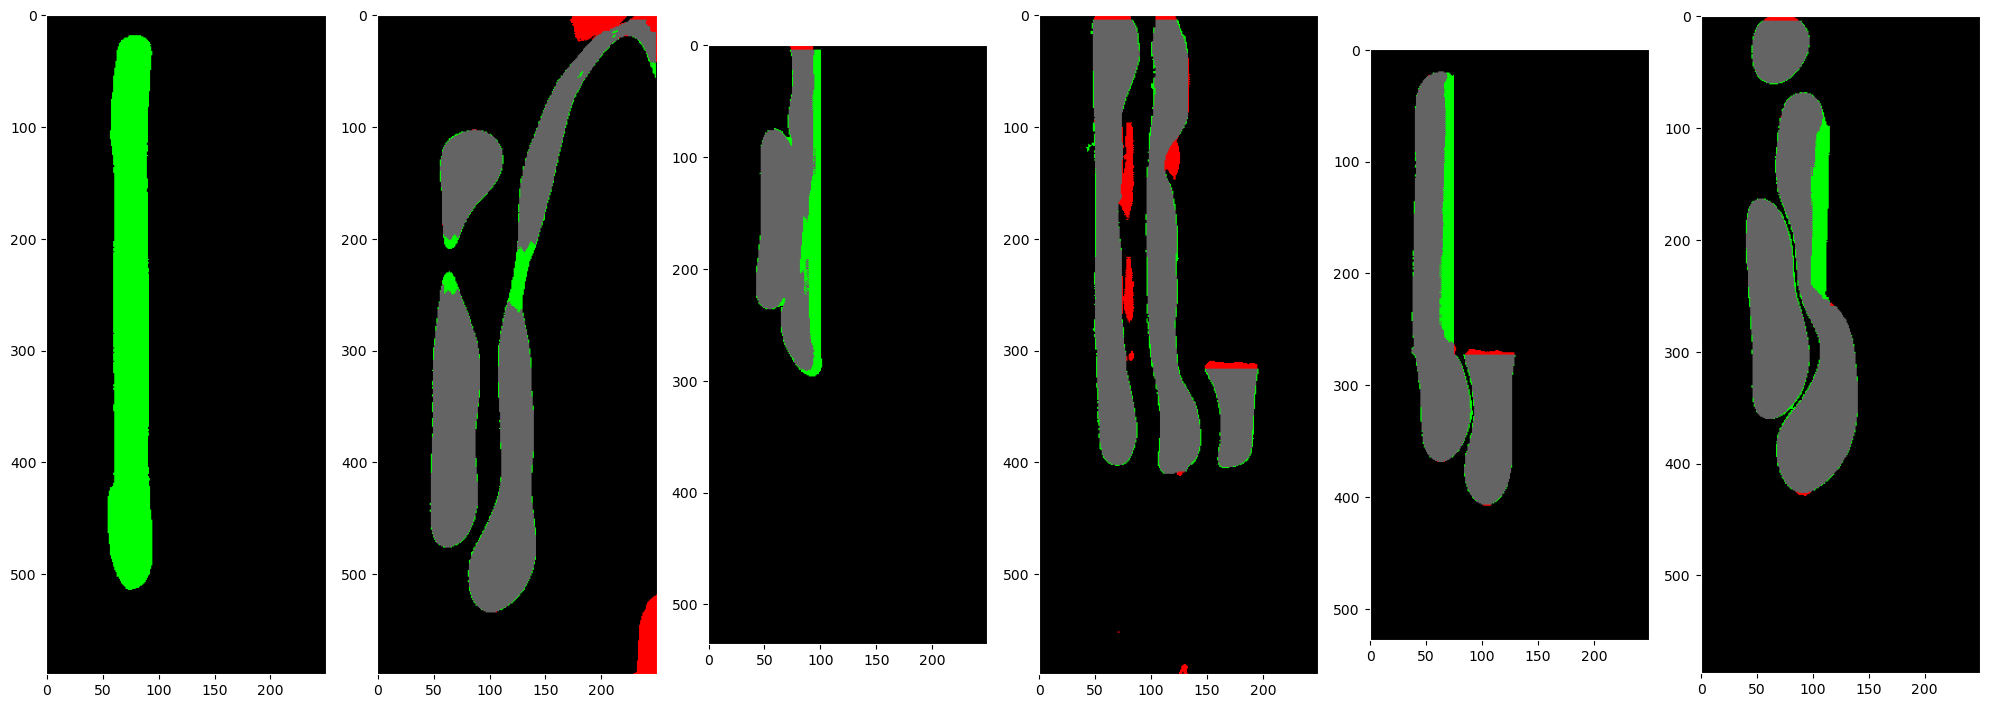

In [21]:
scm.showWorstSegmentation()

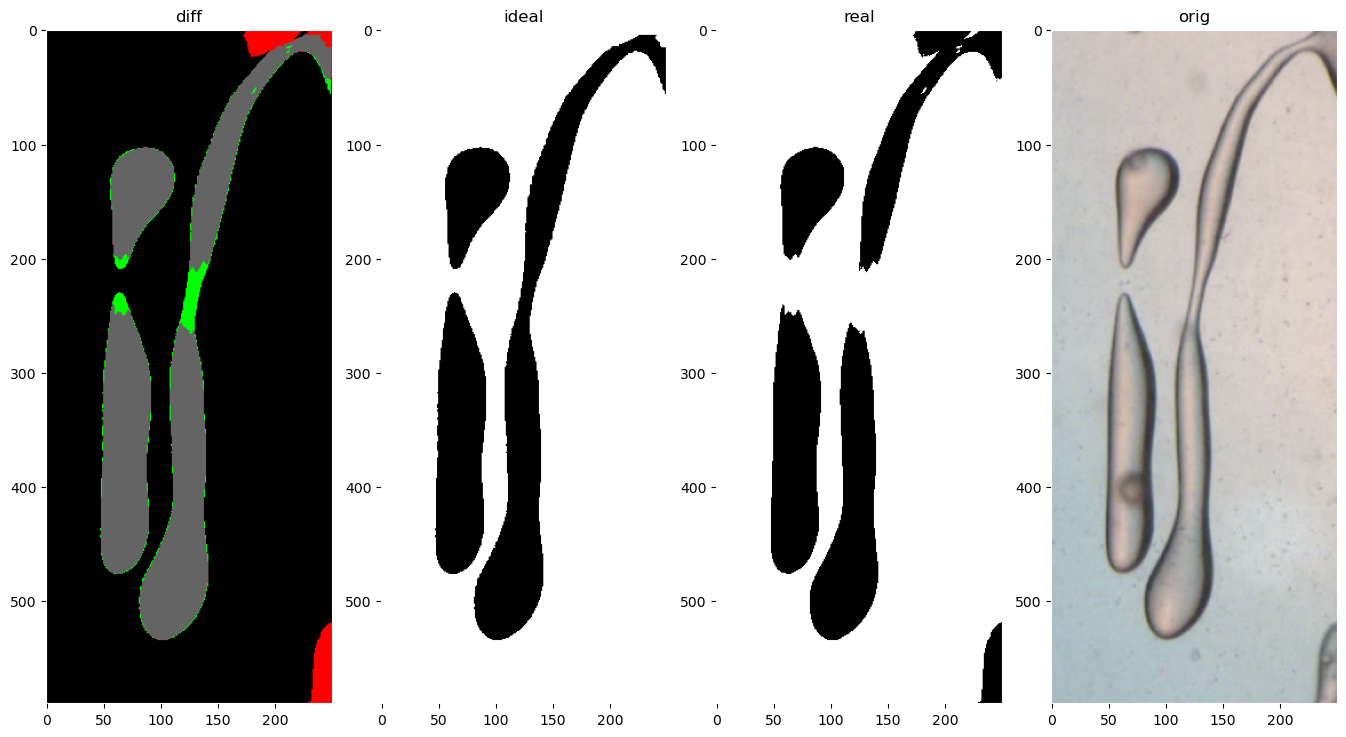

In [22]:
scm.compareFile(86, diag=2)